### High Pass Filter

<img src="highpass.jpg">

#### Using Numerical Method

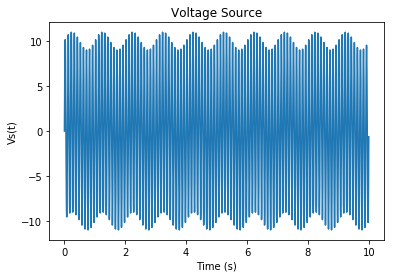

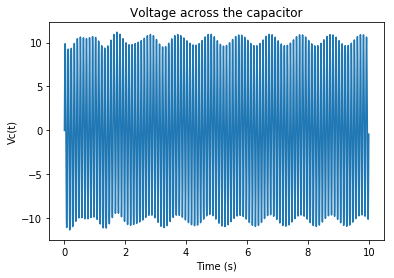

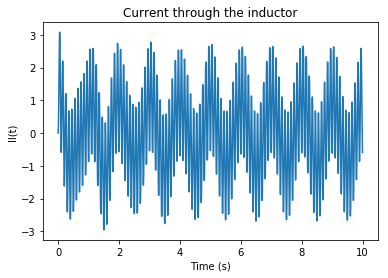

In [4]:
import numpy as np
import matplotlib.pyplot as plt

R = 10
C = 1
L = 1

t = np.arange(0,10,0.001)
Vs = np.sin(2 * np.pi * 1 * t) + 10 *  np.sin(2 * np.pi * 10 * t)

delta = 0.01

Vc = np.zeros(len(t))
Il = np.zeros(len(t))

for i in range(1,len(Vc)):
    Vc[i] = Vc[i-1] + delta * ( Il[i-1]/C  + (Vs[i-1] - Vc[i-1])/(R * C))
    Il[i] = Il[i-1] + delta * (Vs[i-1] - Vc[i-1])/L

plt.plot(t,Vs)
plt.xlabel('Time (s)')
plt.ylabel('Vs(t)')
plt.title('Voltage Source')
plt.show()

plt.plot(t,Vs - Vc)
plt.xlabel('Time (s)')
plt.ylabel('Vc(t)')
plt.title('Voltage across the capacitor')
plt.show()

plt.plot(t,Il)
plt.xlabel('Time (s)')
plt.ylabel('Il(t)')
plt.title('Current through the inductor')
plt.show()

#### Using FFT


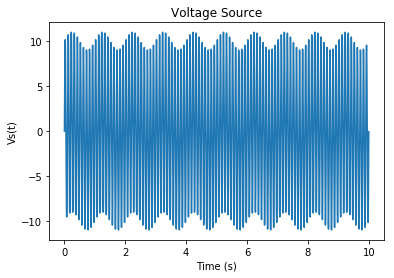

/home/harikrishnan/anaconda2/envs/Python2/lib/python2.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


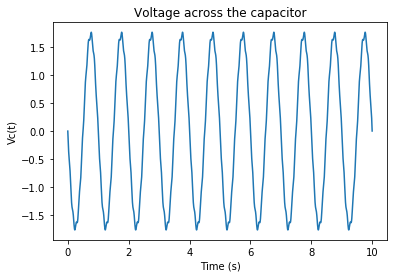

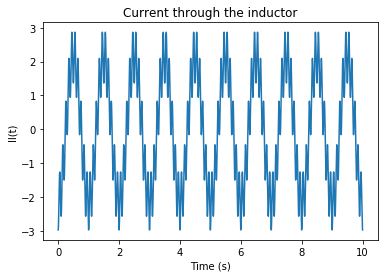

In [2]:
from numpy.fft import fft
from numpy.fft import ifft

R = 10.0
L = 0.2
C = 0.2
T = 10
t = np.arange(0,T,0.0001)

Vs = np.sin(2 * np.pi * 1 * t) + 10 *  np.sin(2 * np.pi * 10 * t)

N = len(t)
w = np.ones(N)
w[0:N/2 +1]= 2 * np.pi/T * np.array([np.arange(0,N/2 +1)])
w[N/2+1 : N] = 2 * np.pi/T * np.arange(-(N/2 -1),0)

Il= ifft(fft(Vs)/((1/(C * 1j * w + 0.0001)) + L * 1j * w))
Vc = ifft(fft(Vs) - L * 1j * w * fft(Il))
plt.plot(t,Vs)
plt.xlabel('Time (s)')
plt.ylabel('Vs(t)')
plt.title('Voltage Source')
plt.show()


plt.plot(t,(Vc))
plt.xlabel('Time (s)')
plt.ylabel('Vc(t)')
plt.title('Voltage across the capacitor')
plt.show()

plt.plot(t,Il)
plt.xlabel('Time (s)')
plt.ylabel('Il(t)')
plt.title('Current through the inductor')
plt.show()